In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("D1.csv")

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             6110 non-null   object 
 1   region                  1659 non-null   object 
 2   country                 6107 non-null   object 
 3   ip_latitude             6110 non-null   float64
 4   ip_longitude            6110 non-null   float64
 5   ip_accuracy             6110 non-null   int64  
 6   gender                  6110 non-null   object 
 7   age                     6110 non-null   object 
 8   height                  6110 non-null   int64  
 9   weight                  6110 non-null   int64  
 10  bmi                     6110 non-null   float64
 11  blood_type              5997 non-null   object 
 12  insurance               4758 non-null   object 
 13  income                  4916 non-null   object 
 14  race                    4942 non-null   

In [16]:
print(data.dtypes)

survey_date                object
region                     object
country                    object
ip_latitude               float64
ip_longitude              float64
ip_accuracy                 int64
gender                     object
age                        object
height                      int64
weight                      int64
bmi                       float64
blood_type                 object
insurance                  object
income                     object
race                       object
immigrant                  object
smoking                    object
alcohol                   float64
cannabis                  float64
amphetamines              float64
cocaine                   float64
contacts_count            float64
house_count               float64
public_transport_count    float64
working                    object
worried                   float64
covid19_positive            int64
covid19_symptoms            int64
covid19_contact             int64
asthma        

In [46]:
#2.1
skewness = data.skew()
print(skewness)

ip_latitude               -2.216036
ip_longitude               1.712252
ip_accuracy                3.130029
age                        8.726695
height                    -0.396537
weight                     1.137239
bmi                        1.968153
alcohol                    1.854553
cannabis                   2.117621
amphetamines               4.888433
cocaine                    6.677918
contacts_count             0.956766
house_count                1.782021
public_transport_count     5.643904
worried                   -0.351016
covid19_positive           0.340764
covid19_symptoms           1.702542
covid19_contact            1.740128
asthma                     2.216737
kidney_disease             8.011834
liver_disease              9.777810
compromised_immune         3.530728
heart_disease              4.553728
lung_disease               5.799262
diabetes                   2.872666
hiv_positive              14.946920
hypertension               1.617772
other_chronic              3

/var/folders/fp/xxcq9s6103d_13rhx_sqpwh80000gn/T/ipykernel_21571/3441849246.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew()


In [36]:
#2.2
missing_values = data.isnull().sum()
print(missing_values)

survey_date                  0
region                    4451
country                      3
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
gender                       0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                 113
insurance                 1352
income                    1194
race                      1168
immigrant                 1168
smoking                     39
alcohol                     41
cannabis                  4527
amphetamines              4607
cocaine                   4619
contacts_count              46
house_count                238
public_transport_count    1268
working                     46
worried                   1332
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromi

In [38]:
#2.3.a
american__who_had_covid = data[(data['country'] == 'US') & (data['covid19_positive'] == 1)]
average_bmi = us_covid_positive['bmi'].mean()
print("The average BMI of a patient from the US who is COVID-19 positive is", average_bmi)


The average BMI of a patient from the US who is COVID-19 positive is 30.803993154592074


In [40]:
#2.3.b
risk_mortality_by_country = data.groupby('country')['risk_mortality'].mean()
highest_risk_country = risk_mortality_by_country.idxmax()
print("The country that has the highest risk of mortality is", highest_risk_country)

The country that has the highest risk of mortality is IT


In [42]:
#2.3.c
positive_cases_by_country = data.groupby('country')['covid19_positive'].sum()
at_least_10_positive_cases = positive_cases_by_country[positive_cases_by_country >= 10]
print("The number of countries that have reported at least 10 positive cases is", len(at_least_10_positive_cases))


The number of countries that have reported at least 10 positive cases is 17


In [44]:
#2.3.d
top_five_countries = positive_cases_by_country.sort_values(ascending=False).head(5)
print("The top-five countries according to the number of positive cases are", top_five_countries.index)


The top-five countries according to the number of positive cases are Index(['US', 'BR', 'GB', 'CA', 'MX'], dtype='object', name='country')


In [49]:
#3.1

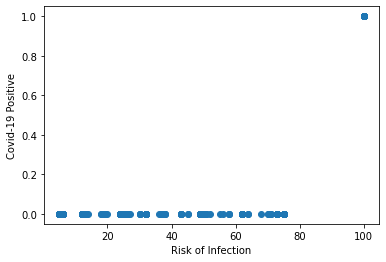

In [51]:
#3.2
plt.scatter(data['risk_infection'], data['covid19_positive'])
plt.xlabel('Risk of Infection')
plt.ylabel('Covid-19 Positive')
plt.show()

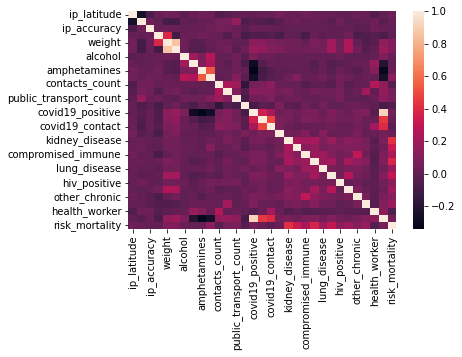

In [54]:
#3.3
correlation = data.corr()
sns.heatmap(correlation)
plt.show()